In [214]:
import pandas as pd
from pandas.io.data import DataReader
import numpy as np
import matplotlib.pylab as plt
import csv
%matplotlib inline

from datetime import datetime

# What can we do with stock info?

In [74]:
ibm = DataReader('IBM',  'yahoo', datetime(1985,1,1), datetime(2016,1,1))

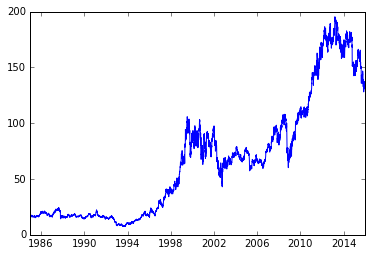

In [154]:
plt.plot(ibm["Adj Close"]);

In [76]:
ibm.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1985-01-02,122.375,122.625,120.750,121.000,3490000,15.383046
1985-01-03,120.375,122.250,119.875,120.000,5552000,15.255913
1985-01-04,120.000,120.375,119.000,119.750,4028000,15.224130
1985-01-07,120.375,120.875,119.750,120.375,4672000,15.303588
1985-01-08,120.125,120.500,119.250,119.750,4492000,15.224130


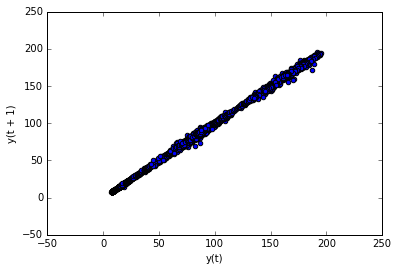

In [155]:
from pandas.tools.plotting import lag_plot
lag_plot(ibm["Adj Close"]);

In [84]:
ibm['Log_Ret'] = np.log(ibm['Close'] / ibm['Close'].shift(1))
ibm['Volatility'] = ibm['Log_Ret'].rolling(center=False,window=252).std() * np.sqrt(252)
ibm.tail()

,Open,High,Low,Close,Volume,Adj Close,Log_Ret,Volatility
Date,,,,,,,,
2015-12-24,138.429993,138.880005,138.110001,138.250000,1495200,134.383434,-0.002095,0.213126
2015-12-28,137.740005,138.039993,136.539993,137.610001,3143400,133.761334,-0.004640,0.213129
2015-12-29,138.250000,140.059998,138.199997,139.779999,3943700,135.870642,0.015646,0.213479
2015-12-30,139.580002,140.440002,139.220001,139.339996,2989400,135.442945,-0.003153,0.213483
2015-12-31,139.070007,139.100006,137.570007,137.619995,3462100,133.771049,-0.012421,0.213791


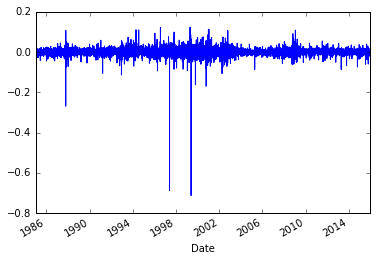

In [156]:
ibm['Log_Ret'].plot();

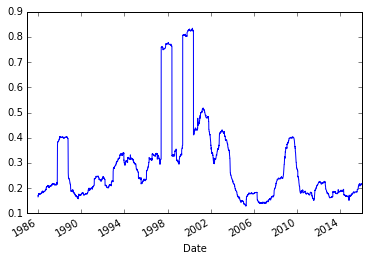

In [157]:
ibm['Volatility'].plot();

In [91]:
quarterly_ibm = ibm.resample('q').mean()

In [98]:
quarterly_ibm.head()

,Open,High,Low,Close,Volume,Adj Close,Log_Ret,Volatility
Date,,,,,,,,
1985-03-31,129.949597,131.151210,129.056452,130.060484,5247361,16.615954,0.000793,NaN
1985-06-30,126.855159,127.636905,125.908730,126.702381,4713053,16.329885,-0.000411,NaN
1985-09-30,127.486111,128.216270,126.634921,127.426587,4308463,16.556877,0.000016,NaN
1985-12-31,136.917969,138.144531,136.183594,137.320312,5139625,18.000498,0.003553,NaN
1986-03-31,152.188525,153.588115,150.522541,152.127049,6813403,20.086182,-0.000427,0.175777


## Let's make ourselves a simple portfolio

In [232]:
aapl = DataReader('AAPL',  'yahoo', datetime(1999,1,1), datetime(2016,1,1))
msft = DataReader('MSFT',  'yahoo', datetime(1999,1,1), datetime(2016,1,1))
jnj = DataReader('JNJ',  'yahoo', datetime(1999,1,1), datetime(2016,1,1))
xom = DataReader('XOM',  'yahoo', datetime(1999,1,1), datetime(2016,1,1))

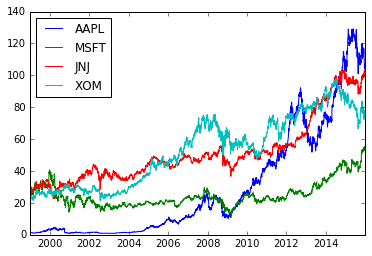

In [242]:
plt.plot(aapl['Adj Close'], label='AAPL');
plt.plot(msft['Adj Close'], label = 'MSFT');
plt.plot(jnj['Adj Close'], label = 'JNJ');
plt.plot(xom['Adj Close'], label = 'XOM');
plt.legend(loc=2);

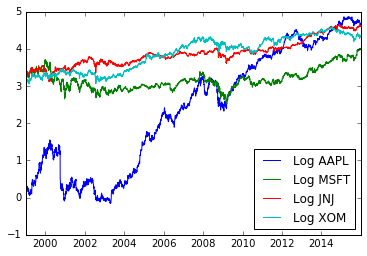

In [240]:
plt.plot(np.log(aapl['Adj Close']), label='Log AAPL');
plt.plot(np.log(msft['Adj Close']), label = 'Log MSFT');
plt.plot(np.log(jnj['Adj Close']), label = 'Log JNJ');
plt.plot(np.log(xom['Adj Close']), label = 'Log XOM');
plt.legend(loc=4);

Things to note: the log closes are closer to linear, so better for a linear regression model. The period 2008-2009 was touch for each of the stocks and may be useful later on for a historical stress test. Last, it's not only macroeconomics that matter -- apparently making something people wanted to buy helped Apple!

# Historical Data from the Federal Reserve

In [216]:
historical_data_int = pandas.read_csv('~/Documents/FinancialMath/SummerSeminar2016/2016-supervisory-historical-data/SupervisoryhistoricalInternational.csv', date_parser=pd.Period)

In [217]:
historical_data_dom = pandas.read_csv('~/Documents/FinancialMath/SummerSeminar2016/2016-supervisory-historical-data/SupervisoryhistoricalDomestic.csv', date_parser=pd.Period)

In [222]:
historical_data_dom.head()

,Date,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
0,Q1 1976,9.3,14.0,4.8,9.5,7.7,4.7,4.9,7.4,7.6,9.4,8.8,6.8,NaN,22.0,51.0,NaN
1,Q2 1976,3.1,7.3,2.1,5.6,7.6,3.6,5.2,7.4,7.6,9.4,8.8,6.9,NaN,22.1,52.0,NaN
2,Q3 1976,2.0,7.4,3.0,9.4,7.7,6.5,5.2,7.3,7.6,9.1,9.0,7.1,NaN,23.1,53.0,NaN
3,Q4 1976,3.0,10.5,2.4,9.0,7.8,5.9,4.7,6.5,7.1,8.8,8.8,6.5,NaN,24.0,53.0,NaN
4,Q1 1977,4.7,11.6,-0.1,7.3,7.5,7.5,4.6,6.8,7.2,8.8,8.7,6.3,NaN,25.0,55.0,NaN


In [223]:
historical_data_dom.set_index('Date')

,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
Date,,,,,,,,,,,,,,,,
Q1 1976,9.3,14.0,4.8,9.5,7.7,4.7,4.9,7.4,7.6,9.4,8.8,6.8,NaN,22.0,51.0,NaN
Q2 1976,3.1,7.3,2.1,5.6,7.6,3.6,5.2,7.4,7.6,9.4,8.8,6.9,NaN,22.1,52.0,NaN
Q3 1976,2.0,7.4,3.0,9.4,7.7,6.5,5.2,7.3,7.6,9.1,9.0,7.1,NaN,23.1,53.0,NaN
Q4 1976,3.0,10.5,2.4,9.0,7.8,5.9,4.7,6.5,7.1,8.8,8.8,6.5,NaN,24.0,53.0,NaN
Q1 1977,4.7,11.6,-0.1,7.3,7.5,7.5,4.6,6.8,7.2,8.8,8.7,6.3,NaN,25.0,55.0,NaN
Q2 1977,8.1,14.3,5.1,12.5,7.1,7.2,4.8,6.8,7.3,8.7,8.8,6.5,NaN,26.5,56.0,NaN
Q3 1977,7.3,12.6,6.3,12.8,6.9,5.6,5.5,7.0,7.3,8.6,8.9,6.9,NaN,27.7,57.0,NaN
Q4 1977,0.0,9.0,7.9,14.3,6.7,6.0,6.1,7.4,7.6,8.9,8.9,7.7,NaN,28.9,58.0,NaN
Q1 1978,1.4,7.6,2.9,9.9,6.3,7.1,6.4,7.8,8.0,9.0,9.2,8.0,NaN,30.2,60.0,NaN


In [224]:
historical_data_dom.corr()

,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
Real GDP growth,1.000000,0.817001,0.305524,0.323054,-0.064580,0.079419,0.091198,0.136941,0.123833,0.000849,0.065965,0.004296,-0.097367,-0.212642,-0.263238,-0.449860
Nominal GDP growth,0.817001,1.000000,0.219400,0.567992,0.023377,0.543240,0.478148,0.477854,0.459634,0.357023,0.421772,0.388240,-0.248188,-0.495161,-0.507128,-0.525563
Real disposable income growth,0.305524,0.219400,1.000000,0.776355,-0.111860,-0.103880,0.092534,0.122827,0.111430,0.065621,0.083515,0.052990,-0.024965,-0.105340,-0.111803,-0.102543
Nominal disposable income growth,0.323054,0.567992,0.776355,1.000000,-0.011546,0.516405,0.500625,0.491920,0.476264,0.420659,0.456760,0.441472,-0.177492,-0.440199,-0.418907,-0.256785
Unemployment rate,-0.064580,0.023377,-0.111860,-0.011546,1.000000,0.017900,0.010915,0.130779,0.195489,0.295677,0.221658,-0.002581,-0.012920,-0.244578,-0.164000,0.119667
CPI inflation rate,0.079419,0.543240,-0.103880,0.516405,0.017900,1.000000,0.643450,0.560879,0.545466,0.511665,0.551940,0.623148,-0.333743,-0.491962,-0.465798,-0.344838
3-month Treasury rate,0.091198,0.478148,0.092534,0.500625,0.010915,0.643450,1.000000,0.960261,0.938201,0.901586,0.939448,0.980379,-0.656924,-0.729364,-0.664441,-0.179363
5-year Treasury yield,0.136941,0.477854,0.122827,0.491920,0.130779,0.560879,0.960261,1.000000,0.995197,0.955126,0.986445,0.925762,-0.791748,-0.800890,-0.735851,-0.192129
10-year Treasury yield,0.123833,0.459634,0.111430,0.476264,0.195489,0.545466,0.938201,0.995197,1.000000,0.968000,0.991280,0.903962,-0.848573,-0.808039,-0.742323,-0.159281
BBB corporate yield,0.000849,0.357023,0.065621,0.420659,0.295677,0.511665,0.901586,0.955126,0.968000,1.000000,0.980392,0.883854,-0.837792,-0.755286,-0.654561,0.198095


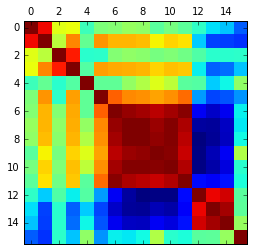

In [225]:
plt.matshow(historical_data_dom.corr());

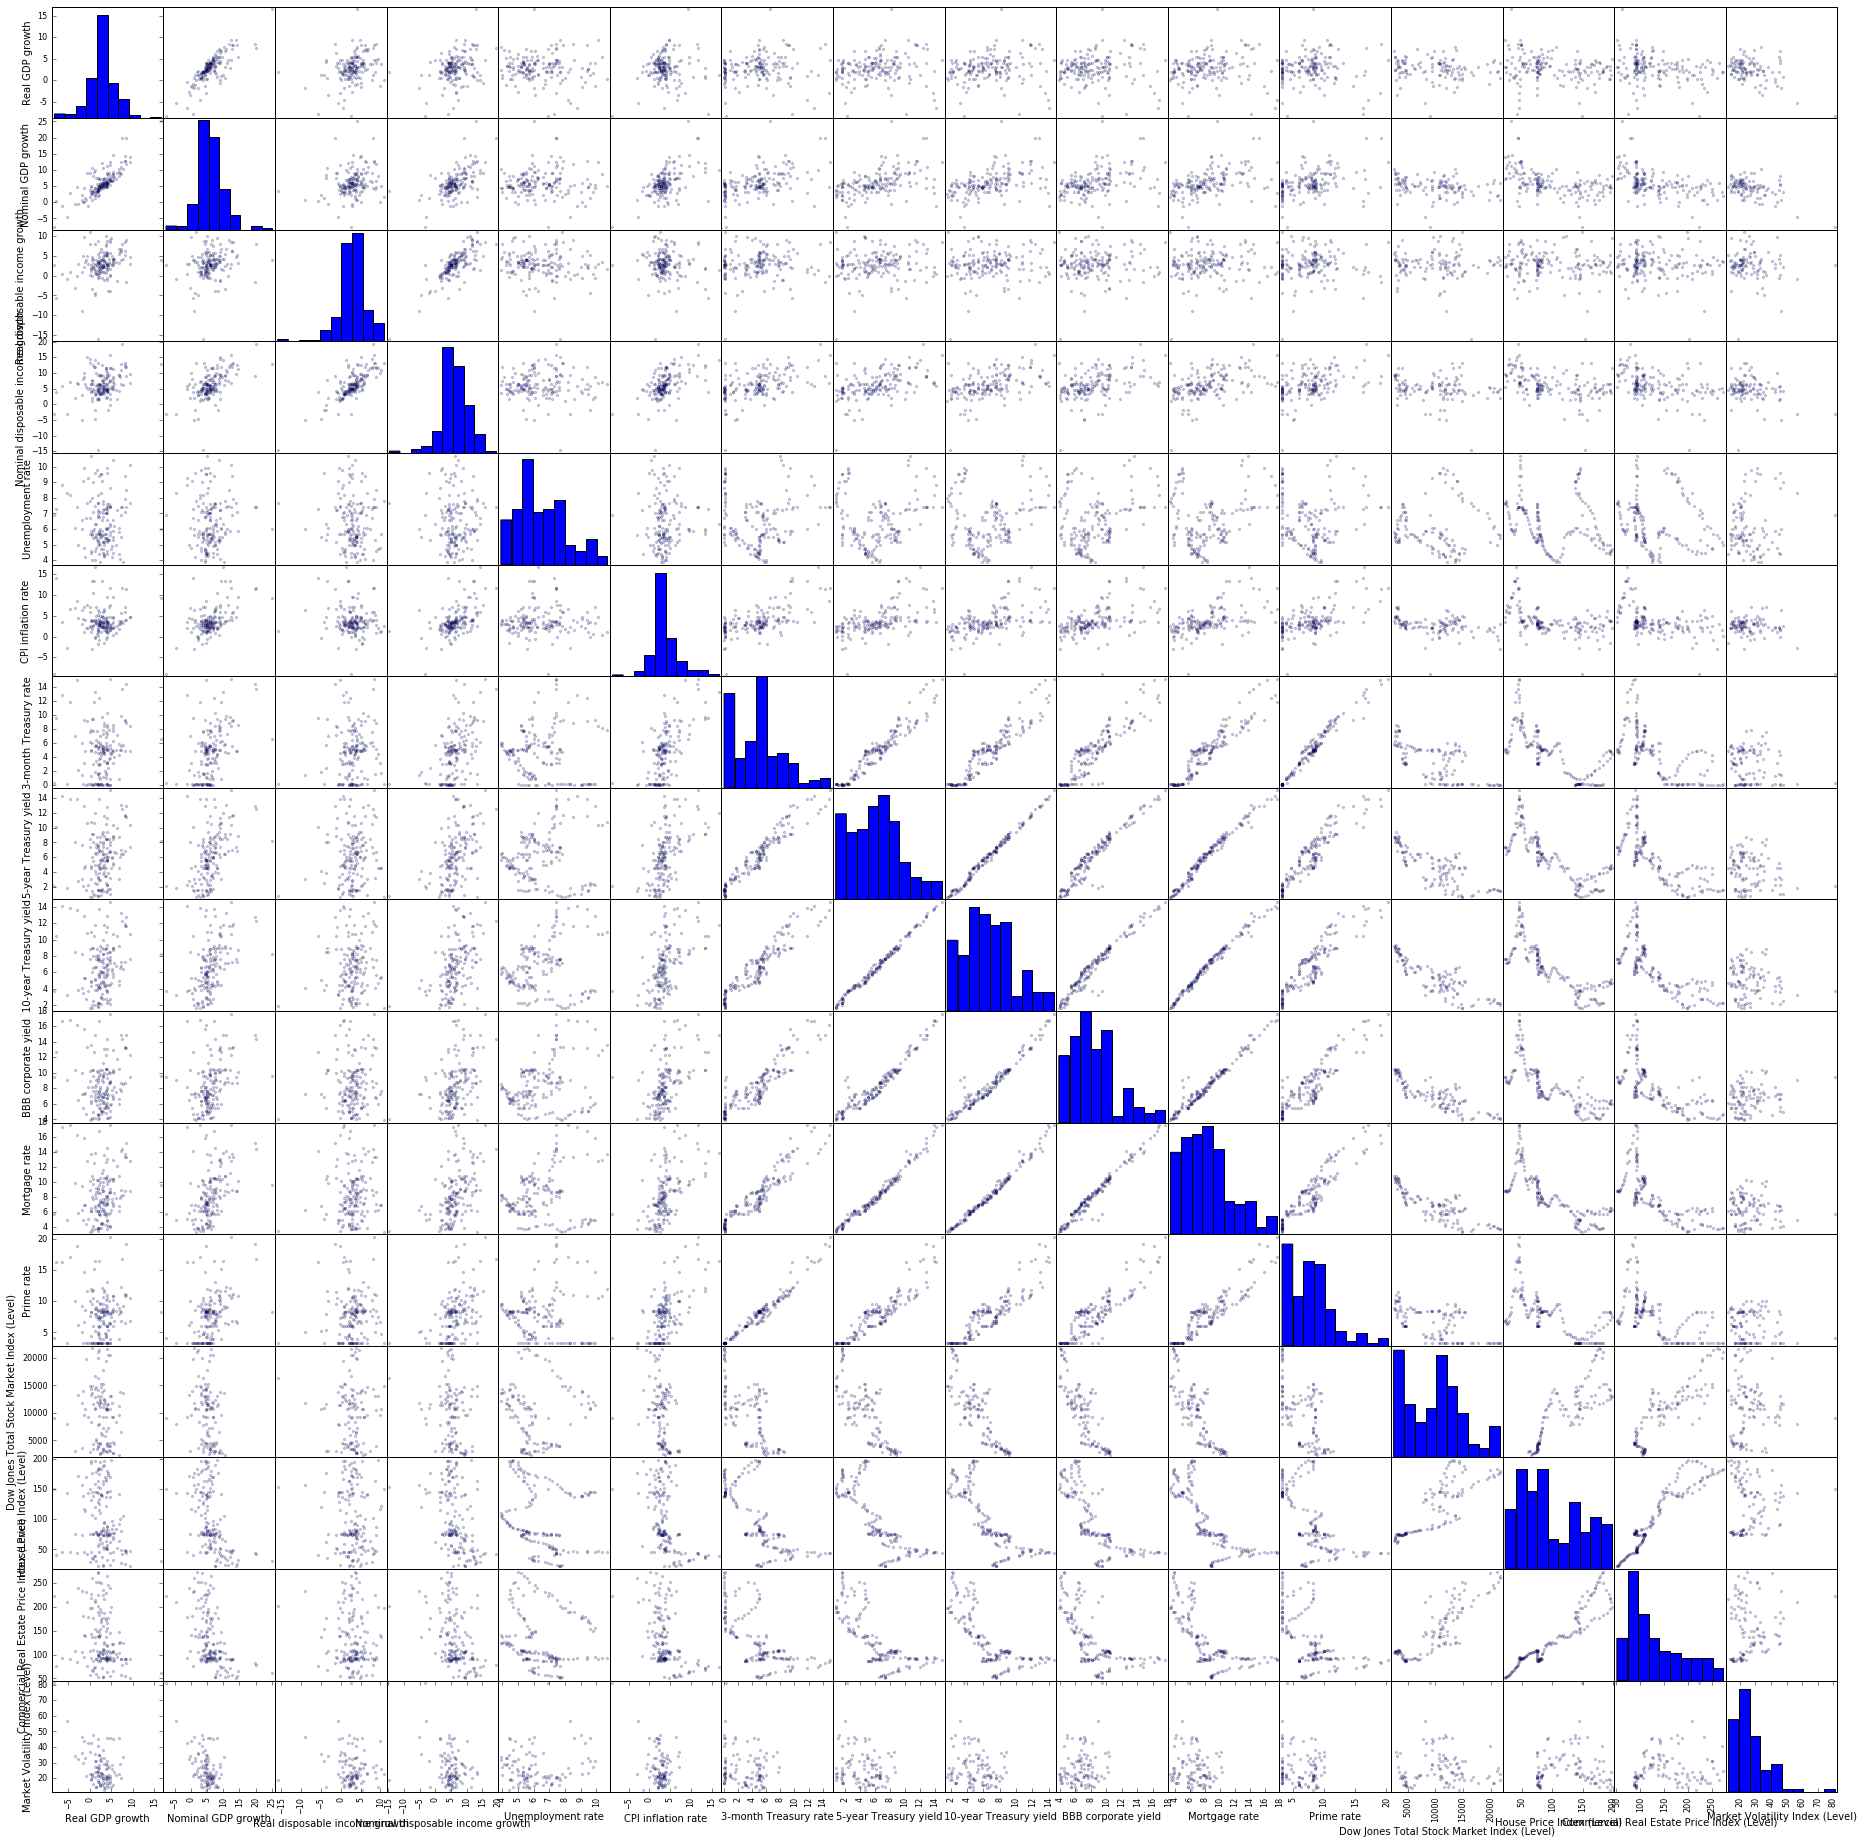

In [226]:
pandas.scatter_matrix(historical_data_dom, alpha=0.2, figsize=(32, 32));

In [227]:
# here I want to make date formats consistent with the IBM quarterly stock data; just switch from Q1 to month-day notation

prng = pd.period_range('1976Q1', '2015Q4', freq='Q-DEC')
historical_data_dom.index = (prng.asfreq('D', 'e'))
historical_data_dom.head()

,Date,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
1976-03-31,Q1 1976,9.3,14.0,4.8,9.5,7.7,4.7,4.9,7.4,7.6,9.4,8.8,6.8,NaN,22.0,51.0,NaN
1976-06-30,Q2 1976,3.1,7.3,2.1,5.6,7.6,3.6,5.2,7.4,7.6,9.4,8.8,6.9,NaN,22.1,52.0,NaN
1976-09-30,Q3 1976,2.0,7.4,3.0,9.4,7.7,6.5,5.2,7.3,7.6,9.1,9.0,7.1,NaN,23.1,53.0,NaN
1976-12-31,Q4 1976,3.0,10.5,2.4,9.0,7.8,5.9,4.7,6.5,7.1,8.8,8.8,6.5,NaN,24.0,53.0,NaN
1977-03-31,Q1 1977,4.7,11.6,-0.1,7.3,7.5,7.5,4.6,6.8,7.2,8.8,8.7,6.3,NaN,25.0,55.0,NaN


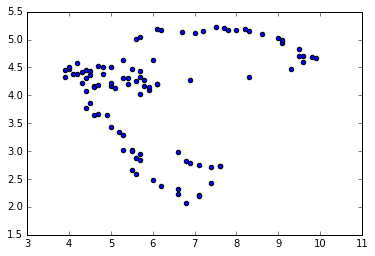

In [247]:
plt.scatter(historical_data_dom['Unemployment rate']['1991-03-31':'2015-03-31'], np.log(quarterly_ibm['Adj Close']['1991-03-31':'2015-03-31']));

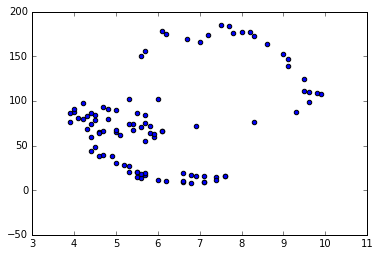

In [229]:
plt.scatter(historical_data['Unemployment rate']['1991-03-31':'2015-03-31'], quarterly_ibm['Adj Close']['1991-03-31':'2015-03-31'])

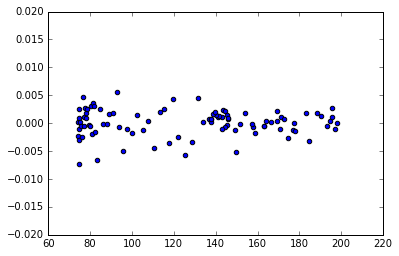

In [230]:
plt.scatter(historical_data['House Price Index (Level)']['1991-03-31':'2015-03-31'], quarterly_ibm['Log_Ret']['1991-03-31':'2015-03-31'])

In [134]:
log_change_in_HPI = np.log(historical_data['House Price Index (Level)']/historical_data['House Price Index (Level)'].shift(1))
log_change_in_HPI.head()

1976-03-31         NaN
1976-06-30    0.004535
1976-09-30    0.044255
1976-12-31    0.038221
1977-03-31    0.040822
Freq: D, Name: House Price Index (Level), dtype: float64

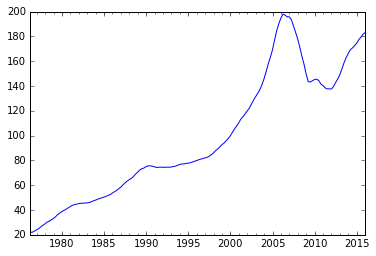

In [250]:
historical_data['House Price Index (Level)'].plot();

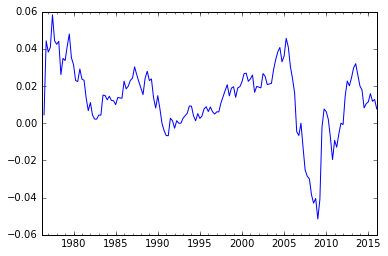

In [248]:
log_change_in_HPI.plot();

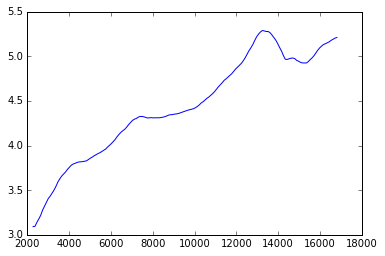

In [249]:
plt.plot(np.log(historical_data_dom['House Price Index (Level)']));

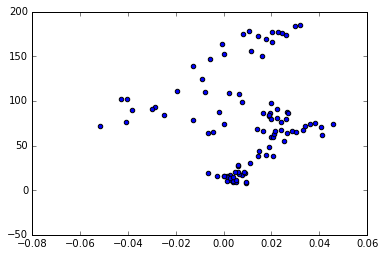

In [175]:
plt.scatter(log_change_in_HPI['1991-03-31':'2015-03-31'], quarterly_ibm['Adj Close']['1991-03-31':'2015-03-31'])

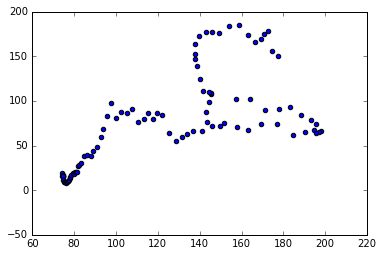

In [176]:
plt.scatter(historical_data['House Price Index (Level)']['1991-03-31':'2015-03-31'], quarterly_ibm['Adj Close']['1991-03-31':'2015-03-31'])

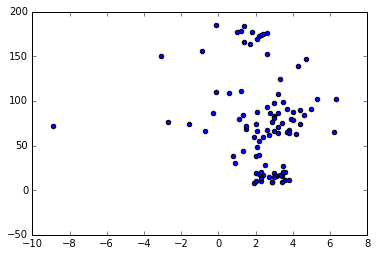

In [178]:
plt.scatter(historical_data['CPI inflation rate']['1991-03-31':'2015-03-31'], quarterly_ibm['Adj Close']['1991-03-31':'2015-03-31']);

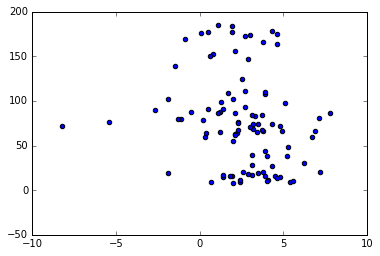

In [180]:
plt.scatter(historical_data['Real GDP growth']['1991-03-31':'2015-03-31'], quarterly_ibm['Adj Close']['1991-03-31':'2015-03-31']);

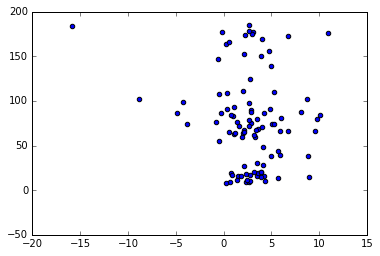

In [181]:
plt.scatter(historical_data['Real disposable income growth']['1991-03-31':'2015-03-31'], quarterly_ibm['Adj Close']['1991-03-31':'2015-03-31']);

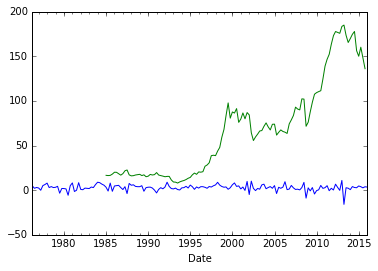

In [251]:
historical_data['Real disposable income growth'].plot(use_index=True);
quarterly_ibm['Adj Close'].plot(use_index=True);

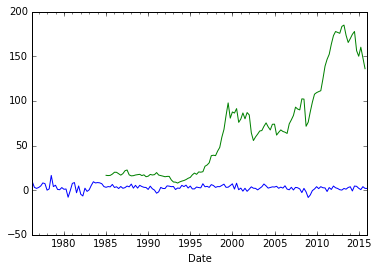

In [252]:
historical_data['Real GDP growth'].plot(use_index=True);
quarterly_ibm['Adj Close'].plot(use_index=True);

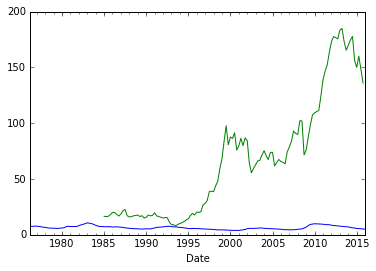

In [253]:
historical_data['Unemployment rate'].plot(use_index=True);
quarterly_ibm['Adj Close'].plot(use_index=True);

Unemployment rate   NaN
dtype: float64

# Value at Risk

### Variance-covariance example for ibm

Note that returns are assumed to be normally distributed and this is a daily VaR. 

In [254]:
from scipy.stats import norm

def var_cov_var(P, c, mu, sigma):
    """
    Variance-Covariance calculation of daily Value-at-Risk
    using confidence level c, with mean of returns mu
    and standard deviation of returns sigma, on a portfolio
    of value P. Adapted from quantstart.com
    """
    alpha = norm.ppf(1-c, mu, sigma)
    return P - P*(alpha + 1)

citi = DataReader("C", 'yahoo', datetime(1999,1,1), datetime(2006,1,1))
citi['Log_ret'] = np.log(citi["Adj Close"]).diff()

P = 1e3   # 1,000,000 USD
c = 0.99  # 99% confidence interval
mu = np.mean(citi['Log_ret'])
sigma = np.std(citi['Log_ret'])

var = var_cov_var(P, c, mu, sigma)
print("Value-at-Risk:", var)

Value-at-Risk: 48.6853919282


By using only data from a stressed period, we can get a different estimate of VaR.

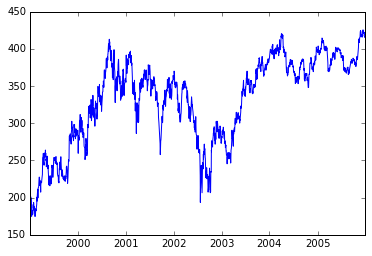

In [256]:
plt.plot(citi['Adj Close']);

In [261]:
P = 1e3
c= 0.99
mu = np.mean(citi['Log_ret']['2002-01-01':'2002-10-01'])
sigma = np.std(citi['Log_ret']['2002-01-01':'2002-10-01'])
var = var_cov_var(P, c, mu, sigma)
print("Value-at-Risk:", var)

Value-at-Risk: 74.2331659336


This is one version of stressed VaR: just use a stressed period from history. Other methodologies are also possible and necessary, since some constellations of economic events have not occurred in history. 

## Portfolio Value at Risk

In [263]:
df = pd.DataFrame({ 'AAPL': aapl["Close"].pct_change(),
                 'MSFT': msft["Close"].pct_change(),
                 'JNJ': jnj["Close"].pct_change(),
                 'XOM': xom["Close"].pct_change() })
dfna = df.dropna()

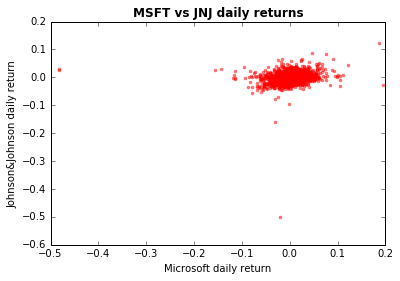

In [264]:
plt.plot(dfna["MSFT"], dfna["JNJ"], 'r.', alpha=0.5)
plt.xlabel(u"Microsoft daily return")
plt.ylabel(u"Johnson&Johnson daily return")
plt.title(u"MSFT vs JNJ daily returns, 1999-2016", weight='bold');

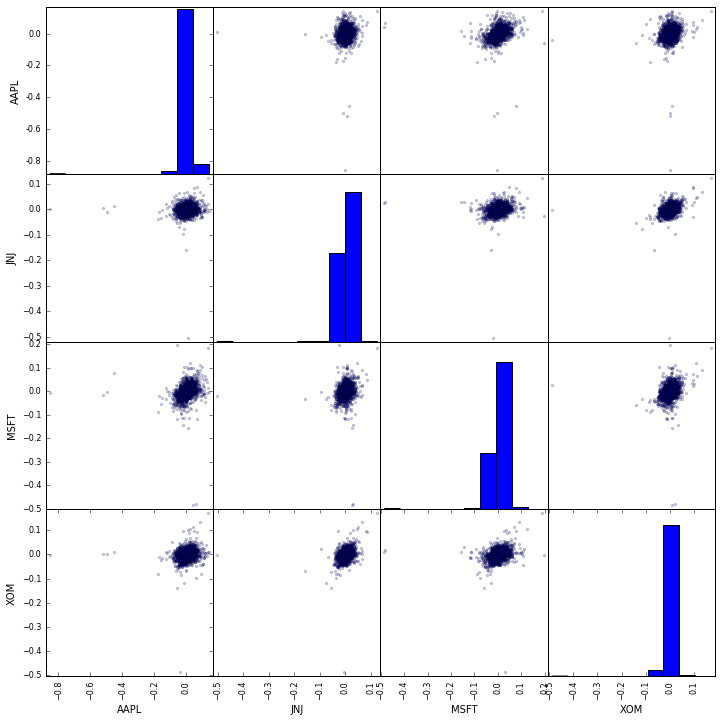

In [266]:
pd.scatter_matrix(dfna, alpha=0.2, figsize=(12, 12));

In [268]:
scs.pearsonr(dfna["MSFT"], dfna["JNJ"])

(0.21976801522090925, 6.2975498962650754e-48)

## Credit Card Chargeoffs and Macroeconomic Data

In [299]:
charge_offs = pd.read_csv('/Users/kaisa/Documents/DataViz/NetChargeoffsAndMacro.csv', date_parser = pd.Period)

In [300]:
prng1 = pd.period_range('1991Q1', '2015Q4', freq='Q-DEC')
charge_offs.index = (prng1.asfreq('D', 'e'))

In [301]:
charge_offs.tail()

,Date,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,...,AgProduction,CommercialIndustrial,SecuredByRealEstate,Consumers,SingleFamResidentialMortgage,LeaseFinancingReceivables,CreditCards,ConsumerOther,CommercialSecuredByRealEstate,FarmlandSecuredByRealEstate
2014-12-31,Q4 2014,2.1,2.2,4.7,4.2,5.7,-0.9,0.0,1.6,2.3,...,12,1068,1657,5952,1351,30,4606,1347,298,7
2015-03-31,Q1 2015,0.6,0.8,3.9,1.9,5.6,-3.1,0.0,1.5,2.0,...,3,629,1538,5728,1409,43,4622,1106,69,1
2015-06-30,Q2 2015,3.9,6.1,2.6,4.9,5.4,3.0,0.0,1.5,2.2,...,11,901,1160,5556,995,35,4586,970,161,1
2015-09-30,Q3 2015,2.0,3.3,3.8,5.1,5.2,1.6,0.0,1.6,2.3,...,8,1055,837,5412,727,49,4286,1126,102,2
2015-12-31,Q4 2015,1.9,1.9,3.5,3.8,5.0,0.2,0.1,1.6,2.2,...,15,1632,1321,6010,1091,64,4622,1387,212,7


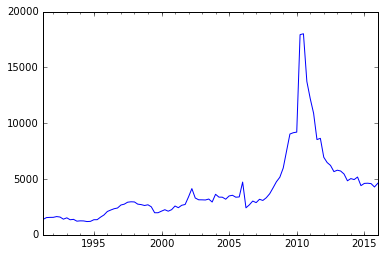

In [302]:
charge_offs['CreditCards'].plot(use_index=True);

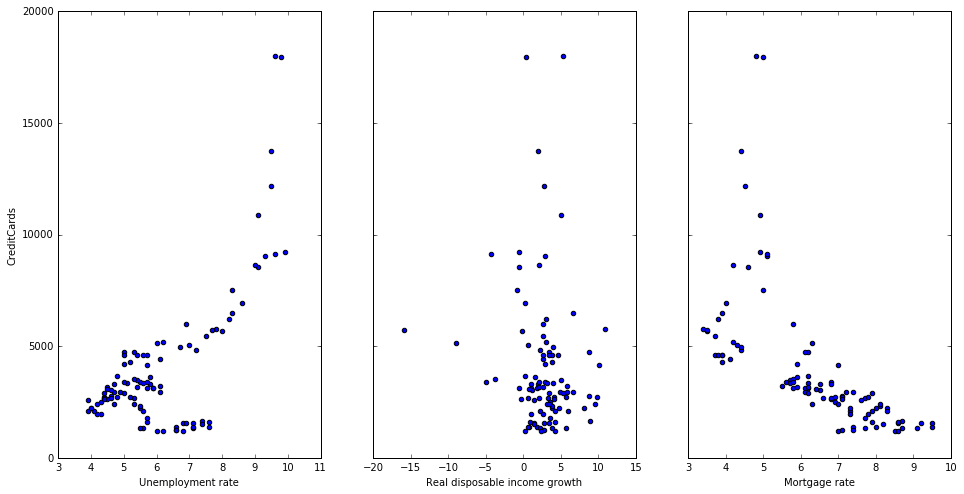

In [303]:
fig, axs = plt.subplots(1,3,sharey=True)
charge_offs.plot(kind='scatter', x='Unemployment rate', y = 'CreditCards', ax=axs[0], figsize=(16, 8))
charge_offs.plot(kind='scatter', x='Real disposable income growth', y = 'CreditCards', ax=axs[1])
charge_offs.plot(kind='scatter', x='Mortgage rate', y = 'CreditCards', ax=axs[2])

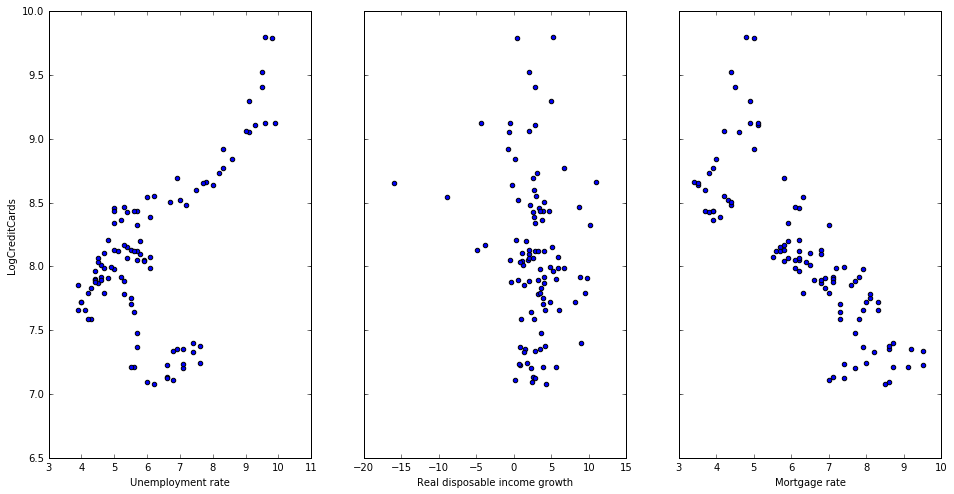

In [304]:
charge_offs['LogCreditCards'] = np.log(charge_offs['CreditCards'])
fig, axs = plt.subplots(1,3,sharey=True);
charge_offs.plot(kind='scatter', x='Unemployment rate', y = 'LogCreditCards', ax=axs[0], figsize=(16, 8));
charge_offs.plot(kind='scatter', x='Real disposable income growth', y = 'LogCreditCards', ax=axs[1]);
charge_offs.plot(kind='scatter', x='Mortgage rate', y = 'LogCreditCards', ax=axs[2]);

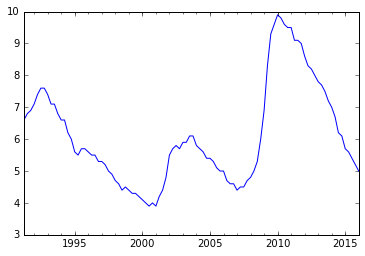

In [305]:
charge_offs['Unemployment rate'].plot(use_index=True);

It looks like high unemployment in the 1990s occurred even with low credit card charge-off rates. Change in law or what? Let's take out that data.

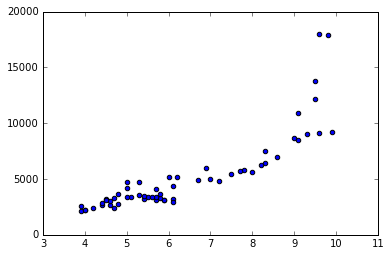

In [309]:
plt.scatter(charge_offs['Unemployment rate']['2000-01-01':'2014-9-30'],charge_offs['CreditCards']['2000-01-01':'2014-9-30'])

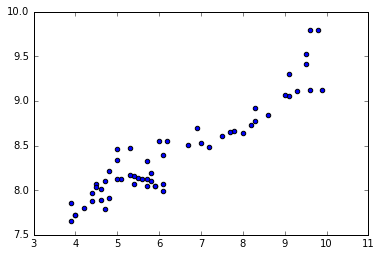

In [312]:
plt.scatter(charge_offs['Unemployment rate']['2000-01-01':'2014-9-30'],np.log(charge_offs['CreditCards']['2000-01-01':'2014-9-30']));

Still not linear, but certainly closer than before!

# Value at risk using Monte Carlo

Modified from Yves Hilpisch's Python for Finance: initial settings changed and print syntax changed for Python 3.4.

In [63]:
import numpy as np
import numpy.random as npr
import scipy.stats as scs
S0 = 100 
r=0.05
sigma = 0.25
T=30/365.
I = 10000 
ST=S0*np.exp((r-0.5*sigma**2)*T + sigma * np.sqrt(T) * npr.standard_normal(I))

In [64]:
R_gbm = np.sort(ST - S0)

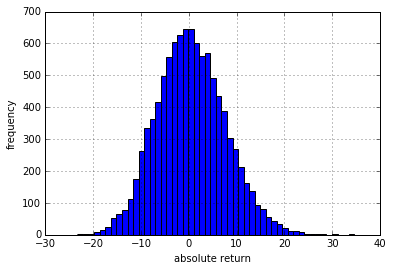

In [65]:
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)


In [69]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print("{} {}".format('Confidence Level', 'Value-at-Risk'))
for pair in zip(percs, var):
    print("{}              {}".format(100 - pair[0], -pair[1]))

Confidence Level Value-at-Risk
99.99              21.676837376205206
99.9              19.356712405686437
99.0              15.253575127915376
97.5              12.887523763262204
95.0              10.754228983678528
90.0              8.655481646782556
